In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
k = 2
cent_change = 0.0001
max_iter = 300

In [21]:
colors = ['g','r','c','b','k','y']

In [4]:
def fit(data,k,max_iter,tol):
    
    centroids = {}
    for i in range(k):
        centroids[i] = data[i]
        
    for i in range(max_iter):
        classifications = {}
        
        for i in range(k):
            classifications[i] = []    
            
        for featureset in data:
            distances = [np.linalg.norm(featureset - centroids[centroid]) for centroid in centroids]
            classification = distances.index(min(distances))
            classifications[classification].append(featureset)
            
        prev_centroids = dict(centroids)
        
        for classification in classifications:
            centroids[classification] = np.average(classifications[classification], axis=0)
            
        optimized = True
        
        for c in centroids:
            original_centroid = prev_centroids[c]
            current_centroid = centroids[c]
            if np.sum((current_centroid - original_centroid)/original_centroid*100.0) >tol:
                optimized = False
                
            if optimized:
                break
        return centroids,classifications

In [5]:
def predict(data,centroids):
    distances = [np.linalg.norm(data - centroids[centroid]) for centroid in centroids]
    classification = distances.index(min(distances))
    return classification

In [6]:
# x = np.array([[1,2],
#             [1.5,1.8],
#             [5,8],
#              [1,0.6],
#              [9,11]]
#             )

In [7]:
# plt.scatter(x[:,0],x[:,1], s=100)

In [8]:
# centroids,classifications = fit(x,k,max_iter,cent_change)

In [9]:
# centroids

In [10]:
# classifications

In [11]:
# for class_1 in centroids:
#     plt.scatter(centroids[class_1][0],centroids[class_1][1],marker='o',color='k',s=50)
    
# for class_2 in classifications:
#     color = colors[class_2]
    
#     for featureset in classifications[class_2]:
#         plt.scatter(featureset[0],featureset[1],marker='.',s=50)
        
# x_test = np.array([[1,3],
#                    [8,9],
#                    [0,3],
#                    [5,4],
#                    [6,4],
#                   ])

# for test in x_test:
#     classification = predict(test,centroids)
#     plt.scatter(test[0],test[1],marker = '*')

In [12]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [13]:
wine = load_wine()
x = pd.DataFrame(wine.data, columns=wine.feature_names)

In [14]:
x = (x-x.min())/(x.max()-x.min())

In [15]:
xtrain,xtest = train_test_split(x,test_size=0.3)

In [16]:
f1 = 'hue'
f2 = 'proline'

basex = np.array(xtrain[[f1,f2]])
xtest = np.array(xtest[[f1,f2]])

In [17]:
centroids,classifications = fit(basex,k,max_iter,cent_change)

In [18]:
centroids

{0: array([0.29327421, 0.20206755]), 1: array([0.53208787, 0.50182111])}

In [19]:
classifications

{0: [array([0.08943089, 0.39728959]),
  array([0.40650407, 0.12268188]),
  array([0.21138211, 0.33666191]),
  array([0.55284553, 0.04778887]),
  array([0.17886179, 0.2403709 ]),
  array([0.04878049, 0.24750357]),
  array([0.46341463, 0.12268188]),
  array([0.09756098, 0.31883024]),
  array([0.2195122 , 0.26533524]),
  array([0.10569106, 0.10485021]),
  array([0.24390244, 0.17261056]),
  array([0.30894309, 0.07132668]),
  array([0.06504065, 0.17261056]),
  array([0.25203252, 0.17261056]),
  array([0.14634146, 0.20114123]),
  array([0.09756098, 0.40085592]),
  array([0.36585366, 0.07631954]),
  array([0.20325203, 0.29743224]),
  array([0.15447154, 0.42938659]),
  array([0.17886179, 0.35805991]),
  array([0.2601626 , 0.11412268]),
  array([0.06504065, 0.2831669 ]),
  array([0.07317073, 0.24393723]),
  array([0.48780488, 0.14407989]),
  array([0.6097561 , 0.10699001]),
  array([0.37398374, 0.09771755]),
  array([0.6097561 , 0.10699001]),
  array([0.45528455, 0.2724679 ]),
  array([0.073170

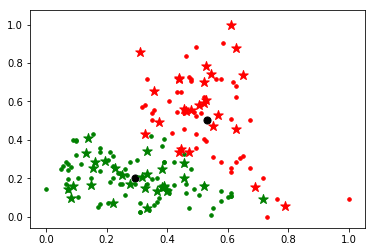

In [22]:
for centroid in centroids:
     plt.scatter(centroids[centroid][0],centroids[centroid][1],marker='o',color='k',s=50)
        
for classification in classifications:
    color = colors[classification]
    
    for next_datapoint in classifications[classification]:
        plt.scatter(next_datapoint[0],next_datapoint[1],marker = '.',color= color, s=50)
        
for test in xtest:
    classification = predict(test, centroids)
    plt.scatter(test[0],test[1],marker='*',color=colors[classification],s=100)
    